In [9]:
# one dimension 
# error
from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt
def bucketsize(point:float,bucket_size:float)-> float:
    return bucket_size*math.floor(point/bucket_size)
def make_histograms(points:List[float],bucket_size:float)->Dict[float,int]:
    return Counter(bucket_size(point,bucket_siz) for pint in points)
def plot_histograms(points:List[float],bucket_size:float,title:str=""):
   histogram=make_histograms(points,bucket_size)
   plt.bar(historgram.keys(),histogram.values(),width=bucket_size)
   plt.title(title)

import random
from scratch.probability import inverse_normal_cdf
random.speed(0)
uniform=[200 * random.random()-100 for _ in range(10000)]
normal=[57* inverse_normal_cdf(random.random())
       for _ in range(10000)]

ModuleNotFoundError: No module named 'scratch'

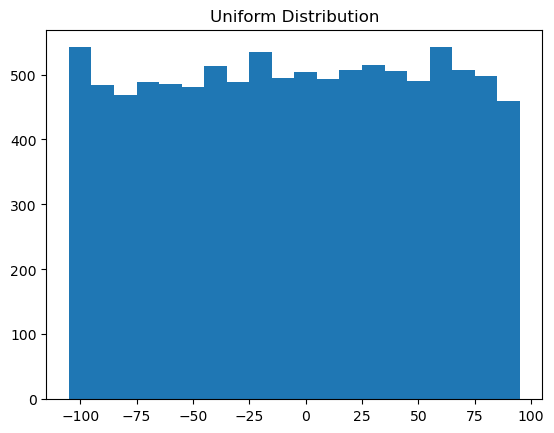

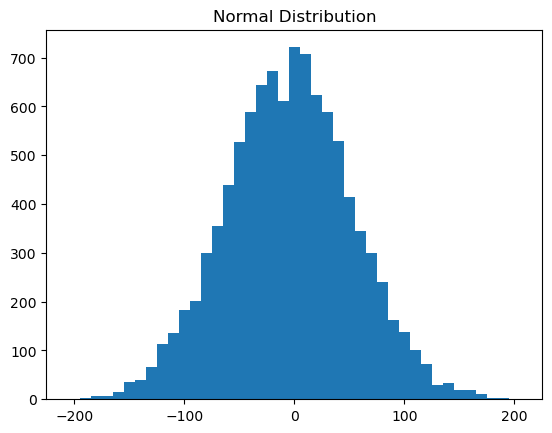

In [11]:
# correction
import math

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float: # 
    """Cumulative distribution function for a normal distribution"""
    return 0.5 * (1 + math.erf((x - mu) / (sigma * math.sqrt(2))))

#erf() (error function) is a special mathematical function available in math.erf()
#that helps approximate the area under the normal curve.
    
# x → The value you want the probability up to.
# mu (μ) → The mean (center) of the distribution. Default = 0.
# sigma (σ) → The standard deviation (spread). Default = 1.

def inverse_normal_cdf(p: float, mu: float = 0, sigma: float = 1, tolerance: float = 1e-5) -> float:
    """Find approximate inverse of normal_cdf using binary search"""
    if mu != 0 or sigma != 1:
        # standardize to normal distribution, then rescale
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z, hi_z = -10.0, 10.0  # most z-scores lie within this
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        else:
            hi_z = mid_z
    return mid_z
    
# Import necessary modules
from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt
import random

# Helper functions
# Function to determine which bucket a given value belongs to
def bucket_size(point: float, size: float) -> float:
    return size * math.floor(point / size)
    
# Function to create histogram data (counts per bucket)
def make_histogram(points: List[float], size: float) -> Dict[float, int]:
    return Counter(bucket_size(point, size) for point in points)

# Function to plot the histogram using matplotlib
def plot_histogram(points: List[float], size: float, title: str = ""):
    histogram = make_histogram(points, size)
    plt.bar(histogram.keys(), histogram.values(), width=size)
    plt.title(title)
    plt.show()

# Generating random data for visualization
random.seed(0) # Set random seed for reproducibility (typo corrected: 'speed' → 'seed')

# Generate 10,000 uniformly distributed random numbers between -100 and +100
uniform = [200 * random.random() - 100 for _ in range(10000)]
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

# Plot histograms
plot_histogram(uniform, 10, "Uniform Distribution")
plot_histogram(normal, 10, "Normal Distribution")

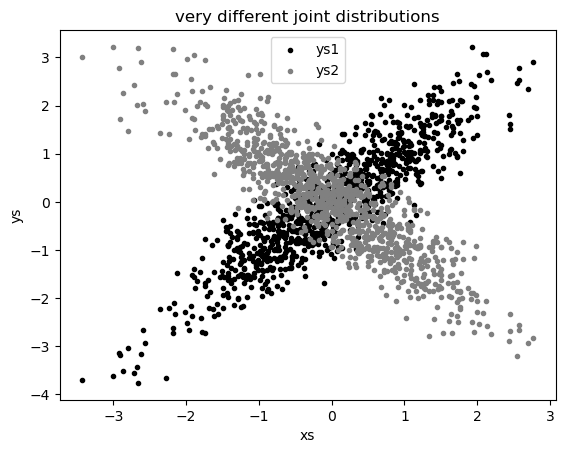

In [27]:
# 2d
#fake dataset # just refresh
def random_normal() -> float:
    """return a random draw from standard normal distribution"""
    return inverse_normal_cdf(random.random())
xs=[random_normal() for _ in range(1000)]
ys1=[x+random_normal()/2 for x in xs]
ys2=[-x+random_normal()/2 for x in xs]
plt.scatter(xs,ys1,marker='.',color='black' , label='ys1')
plt.scatter(xs,ys2,marker='.',color='grey' , label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("very different joint distributions")
plt.show()

In [31]:
from scratch.statistics import correlation
print(correlation(xs,ys1))
print(correlation(xs,ys2))

ModuleNotFoundError: No module named 'scratch'

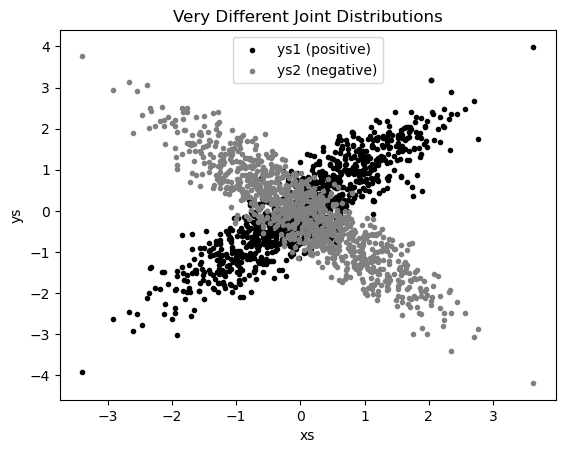

Correlation between xs and ys1: 0.8858792792314161
Correlation between xs and ys2: -0.8973175517040312


In [40]:
# correction 
import random
import math
import matplotlib.pyplot as plt
from typing import List

# -----------------------
# 1️⃣ Define correlation helper
# -----------------------
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

def de_mean(xs: List[float]) -> List[float]:
    """Return a list of deviations from the mean"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def dot(xs: List[float], ys: List[float]) -> float:
    """Compute dot product"""
    return sum(x * y for x, y in zip(xs, ys))

def correlation(xs: List[float], ys: List[float]) -> float:
    """Measure how closely xs and ys move together"""
    stdev_x = math.sqrt(dot(de_mean(xs), de_mean(xs)) / (len(xs) - 1))
    stdev_y = math.sqrt(dot(de_mean(ys), de_mean(ys)) / (len(ys) - 1))
    if stdev_x > 0 and stdev_y > 0:
        return dot(de_mean(xs), de_mean(ys)) / ((len(xs) - 1) * stdev_x * stdev_y)
    else:
        return 0

# -----------------------
# 2️⃣ Define inverse_normal_cdf (approximation)
# -----------------------
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=1e-5):
    """Approximation for inverse CDF using binary search"""
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, hi_z = -10.0, 10.0
    while hi_z - low_z > tolerance:
        mid_z = (hi_z + low_z) / 2
        mid_p = 0.5 * (1 + math.erf(mid_z / math.sqrt(2)))
        if mid_p < p:
            low_z = mid_z
        else:
            hi_z = mid_z
    return mid_z

# -----------------------
# 3️⃣ Generate data
# -----------------------
def random_normal() -> float:
    """Return a random draw from standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]    # positively correlated
ys2 = [-x + random_normal() / 2 for x in xs]   # negatively correlated

# -----------------------
# 4️⃣ Plot
# -----------------------
plt.scatter(xs, ys1, marker='.', color='black', label='ys1 (positive)')
plt.scatter(xs, ys2, marker='.', color='grey', label='ys2 (negative)')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

# -----------------------
# 5️⃣ Test correlation
# -----------------------
print("Correlation between xs and ys1:", correlation(xs, ys1))
print("Correlation between xs and ys2:", correlation(xs, ys2))


In [42]:
# many dimensions
from scratch.linear_algebra import Matrix, vector ,make_matrix
def correlation_matrix(data:List[Vector])-> Matrix:
    """returns the len(data) x len(data) matrix whose(i,j) the entry is correlation between data[i] and data
    [j]"""
    def correlation_ij(i:int,j:int)-> float:
        return correlation(data[j])
return make_matrix(len(data),len(data),correlation_ij)

ModuleNotFoundError: No module named 'scratch'

In [44]:
#corrected one
import numpy as np
from typing import List

# Example correlation function
def correlation(x: List[float], y: List[float]) -> float:
    """Return the Pearson correlation coefficient between x and y"""
    x_mean, y_mean = np.mean(x), np.mean(y)
    numerator = np.sum((np.array(x) - x_mean) * (np.array(y) - y_mean))
    denominator = np.sqrt(np.sum((np.array(x) - x_mean)**2) * np.sum((np.array(y) - y_mean)**2))
    return numerator / denominator if denominator != 0 else 0

# Create correlation matrix manually
def correlation_matrix(data: List[List[float]]) -> np.ndarray:
    """
    Returns a square matrix (n x n) where entry (i,j) is the correlation 
    between data[i] and data[j].
    """
    n = len(data)
    matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            matrix[i, j] = correlation(data[i], data[j])
    return matrix

# Example data: 3 variables, each with 5 values
data = [
    [10, 20, 30, 40, 50],  # X
    [15, 25, 35, 45, 55],  # Y (positively correlated)
    [50, 40, 30, 20, 10]   # Z (negatively correlated)
]

corr_mat = correlation_matrix(data)
print("Correlation Matrix:")
print(corr_mat)

Correlation Matrix:
[[ 1.  1. -1.]
 [ 1.  1. -1.]
 [-1. -1.  1.]]


In [47]:
# subplots
import matplotlib.pyplot as plt

# Example correlation data: 3 vectors
corr_data = [
    [10, 20, 30, 40, 50],  # X
    [15, 25, 35, 45, 55],  # Y
    [50, 40, 30, 20, 10]   # Z
]

num_vectors=len(corr_data)
fig, ax=plt.subplots(num_vectors,num_vectors)
for i in range(num_vectors):
    if i!=j:ax[i][j].scatter(corr_data[j],corr_data[i])
    else:ax[i][j].annotate("series"+str(i),(0.5,0.5),
                          xycoords='axes fraction',
                          ha='center', va="center")
    if i < num_vectors-1:ax[i][j].axis.set_visible(False)
    if j>0: ax[i][j].yaxis.set_visible(False)
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()

NameError: name 'corr_data' is not defined

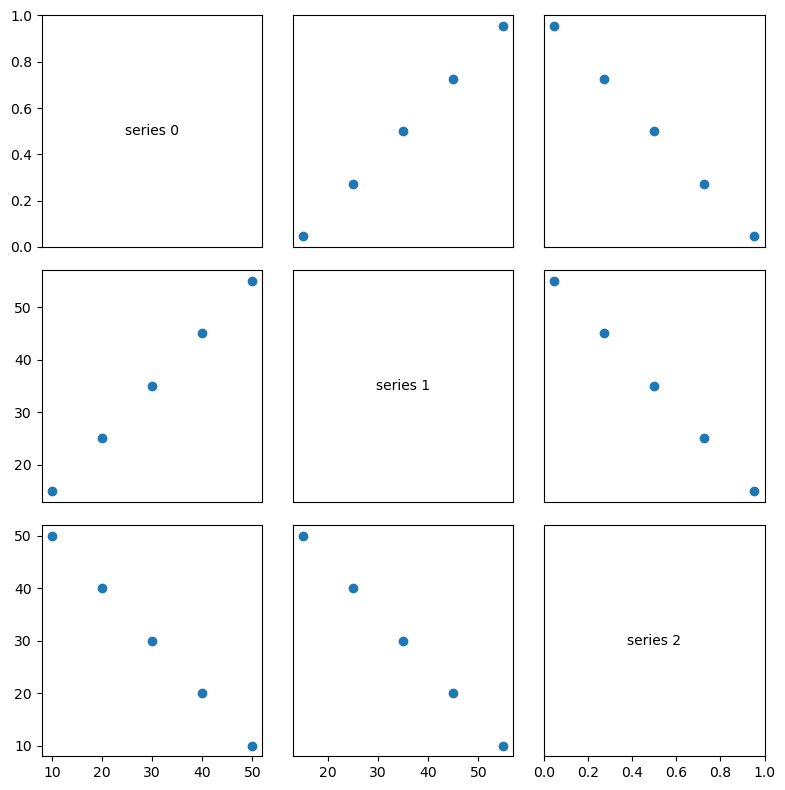

In [49]:
# correct
import matplotlib.pyplot as plt

# Example correlation data: 3 vectors  # book mai nhi h create by own
corr_data = [
    [10, 20, 30, 40, 50],  # X
    [15, 25, 35, 45, 55],  # Y
    [50, 40, 30, 20, 10]   # Z
]

# Number of vectors (series) we have
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors, figsize=(8, 8))


# Loop over rows (i) and columns (j) of the subplot grid
for i in range(num_vectors):
    for j in range(num_vectors):
        if i != j:
            ax[i][j].scatter(corr_data[j], corr_data[i]) ## Off-diagonal: scatterplot of series i vs series j
        else:
            ax[i][j].annotate(f"series {i}",  # Diagonal: show the series label
                              (0.5, 0.5), # position in the axes
                              xycoords='axes fraction',
                              ha='center',# horizontal alignment
                              va='center')
            
        if i < num_vectors - 1: # Hide x-axis labels for all but the bottom row
            ax[i][j].xaxis.set_visible(False)
        if j > 0:
            ax[i][j].yaxis.set_visible(False)

plt.tight_layout() # Automatically adjust spacing so plots don’t overlap
plt.show()

In [53]:
# USing named tuples ,book ka examlpe nhi lia h chatgpt ka use krk another example
from collections import namedtuple

# Define a named tuple called Point with fields 'x' and 'y'
Point = namedtuple('Point', ['x', 'y'])

# Create instances of Point
p1 = Point(10, 20)
p2 = Point(5, 15)

# Access fields by name
print("p1 x:", p1.x)  # 10
print("p1 y:", p1.y)  # 20

# Access fields by index (still possible)
print("p2[0]:", p2[0])  # 5
print("p2[1]:", p2[1])  # 15

# You can also unpack named tuples
x_val, y_val = p1
print("Unpacked:", x_val, y_val)  # 10 20


# Why use named tuples?
# Readable code: You can write p1.x instead of p1[0].
# Lightweight: Unlike classes, they don’t have methods or extra memory overhead.
# Immutable: Once created, values cannot be changed (like a regular tuple).

p1 x: 10
p1 y: 20
p2[0]: 5
p2[1]: 15
Unpacked: 10 20


In [57]:
# Dataclasses
# error
from dataclasses import dataclass
@dataclass
class StockPrice2:
    symbol:str
    date:datetime.date
    closing_price:float

    def is_high_tech(self) -> bool:
        """its a class ,so we can add methods too"""
        return self.symbol in ["msft","goog","fb","amzn","aapl"]
price2=StockPrice2('msft',datetime.date(2018,12,14),103.03)
assert price2.symbol=='msft'
assert price2.closing_price=='106.03'
assert price2.is_high_tech()

NameError: name 'datetime' is not defined

In [61]:
# correction
from dataclasses import dataclass # Import the dataclass decorator to create lightweight classes for storing data
import datetime # Import datetime module to work with date objects

# Use @dataclass to automatically generate methods like __init__, __repr__, __eq__, etc.
@dataclass
class StockPrice2:
    symbol: str # The stock symbol, e.g., 'MSFT', 'AAPL'
    date: datetime.date # The date for which this stock price applies
    closing_price: float # The closing price of the stock as a float

    def is_high_tech(self) -> bool: # Define a method to check if the stock belongs to high-tech companies
        """Check if the stock belongs to a high-tech company"""

        # Convert symbol to lowercase for case-insensitive comparison
        # Check if symbol is in the predefined high-tech list
        return self.symbol.lower() in ["msft", "goog", "fb", "amzn", "aapl"]

# Create an instance of StockPrice2
price2 = StockPrice2('msft', # Check that the symbol attribute is set correctly
                     
                     datetime.date(2018, 12, 14), 103.03) 

                    # Check that the closing_price attribute is correct
                    # Note: Must match the float we assigned (103.03)
assert price2.symbol == 'msft'
assert price2.closing_price == 103.03   # ❌ Your code had 106.03, which is wrong
assert price2.is_high_tech()            # True, because 'msft' is in the list

assert price2.closing_price == 103.03

In [ ]:
# A dataclass is a special kind of class in Python designed mainly to store data.
# class Stock:
#     def __init__(self, symbol, date, price):
#         self.symbol = symbol
#         self.date = date
#         self.price = price


# You can simply write:
# from dataclasses import dataclass

# @dataclass
# class Stock:
#     symbol: str
#     date: str
#     price: float

# Python automatically generates:

# __init__ → to initialize the object

# __repr__ → to nicely print the object

# __eq__ → to compare two objects for equality

# And other utility methods